In [1]:
import pandas as pd

In [19]:
df = pd.read_parquet('data/experiment.parquet')
df.head(20)

,City,State,Year,Algorithm_l,Distance
index,,,,,
0,Davis,CA,2010,Frank,5.085678
1,Davis,CA,2010,Noah_C,24.225463
2,Davis,CA,2010,Noah_S,14.085326
3,Davis,CA,2011,Frank,3.519763
4,Davis,CA,2011,Noah_C,24.770929
5,Davis,CA,2011,Noah_S,12.987980
6,Davis,CA,2012,Frank,1.984338
7,Davis,CA,2012,Noah_C,24.792897
8,Davis,CA,2012,Noah_S,11.397326


In [20]:
df.groupby('Algorithm_l')['Distance'].mean()

Algorithm_l
Frank        6.937199
Noah_C    2591.776606
Noah_S      15.595157
Name: Distance, dtype: float64

In [21]:
df.groupby(['Algorithm_l', 'Year'])['Distance'].mean()

Algorithm_l  Year
Frank        2010       5.085678
             2011       3.519763
             2012       3.301981
             2013       7.377857
             2014       6.972529
             2015       7.989612
             2016       8.704534
             2017       8.169052
             2018       8.926623
             2019       8.919129
             2020       7.737539
             2021       7.357925
             2022       6.112149
             2023       6.194115
Noah_C       2010      24.225463
             2011      24.770929
             2012      22.828266
             2013    2064.359308
             2014    1396.155455
             2015    2544.293608
             2016    3476.411057
             2017    2455.482767
             2018    2382.181573
             2019    2611.095781
             2020    2540.541067
             2021    2474.929911
             2022    2661.243972
             2023    2641.444354
Noah_S       2010      14.085326
             2011      12

In [23]:
df.loc[(df['City'] == 'Atlanta') & (df['State'] == 'GA')]

,City,State,Year,Algorithm_l,Distance
index,,,,,
96,Atlanta,GA,2015,Frank,7.546460
97,Atlanta,GA,2015,Noah_C,43.463305
98,Atlanta,GA,2015,Noah_S,13.286210
177,Atlanta,GA,2016,Frank,9.990502
178,Atlanta,GA,2016,Noah_C,43.801391
179,Atlanta,GA,2016,Noah_S,15.741850
333,Atlanta,GA,2017,Frank,7.973531
334,Atlanta,GA,2017,Noah_C,33.903086
335,Atlanta,GA,2017,Noah_S,11.898936


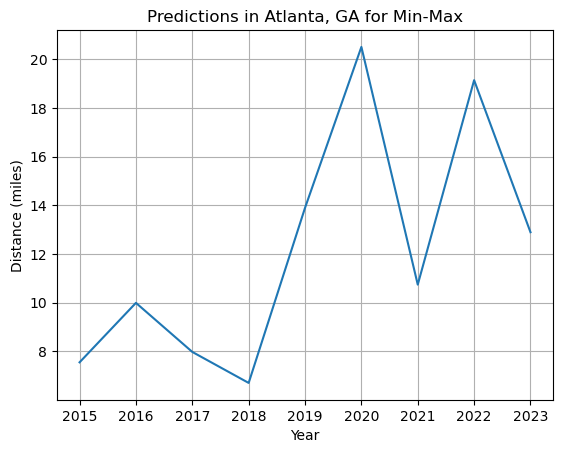

In [55]:
import matplotlib.pyplot as plt
dat = df.loc[(df['City'] == 'Atlanta') & (df['State'] == 'GA') & (df['Algorithm_l'] == 'Frank')]
plt.plot(dat['Year'], dat['Distance'])
plt.xlabel('Year')
plt.ylabel('Distance (miles)')
plt.title('Predictions in Atlanta, GA for Min-Max')
plt.grid()

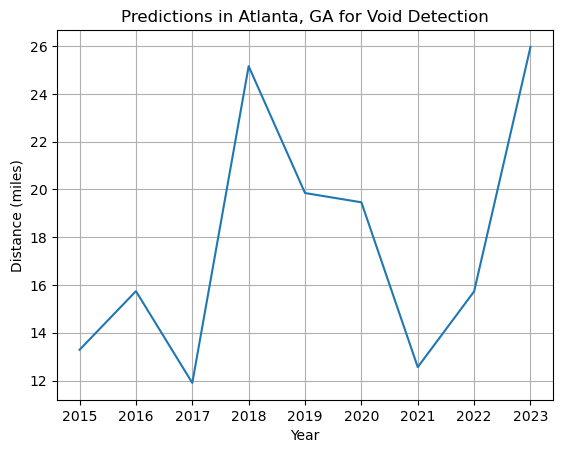

In [54]:
import matplotlib.pyplot as plt
dat = df.loc[(df['City'] == 'Atlanta') & (df['State'] == 'GA') & (df['Algorithm_l'] == 'Noah_S')]
plt.plot(dat['Year'], dat['Distance'])
plt.xlabel('Year')
plt.ylabel('Distance (miles)')
plt.title('Predictions in Atlanta, GA for Void Detection')
plt.grid()

In [27]:
df.groupby('Algorithm_l')['Distance'].min()

Algorithm_l
Frank     0.181641
Noah_C    5.835239
Noah_S    5.573324
Name: Distance, dtype: float64

In [28]:
df.groupby('Algorithm_l')['Distance'].max()

Algorithm_l
Frank      149.187881
Noah_C    9546.177937
Noah_S     162.132311
Name: Distance, dtype: float64

In [30]:
df.loc[df['Distance'] == df['Distance'].min()]

,City,State,Year,Algorithm_l,Distance
index,,,,,
174,Washington,DC,2015,Frank,0.181641


In [32]:
frank = df.loc[df['Algorithm_l'] == 'Frank']
frank.loc[frank['Distance'] == frank['Distance'].max()]

,City,State,Year,Algorithm_l,Distance
index,,,,,
6606,New York,NY,2023,Frank,149.187881


In [37]:
locations = pd.read_parquet('data/OpenStations.parquet')
locations = locations.loc[locations['Year'] >= 2010]
loc_count = locations.groupby('Year').count()
loc_count

,Station Name,Street Address,City,State,ZIP,Latitude,Longitude,Open Date,Algorithm
Year,,,,,,,,,
2010,44,44,44,44,44,44,44,44,44
2011,639,639,639,639,639,639,639,639,639
2012,910,910,910,910,910,910,910,910,910
2013,497,497,497,497,497,497,497,497,497
2014,1008,1008,1008,1008,1008,1008,1008,1008,1008
2015,1940,1940,1940,1940,1940,1940,1940,1940,1940
2016,1871,1871,1871,1871,1871,1871,1871,1871,1871
2017,2227,2227,2227,2227,2227,2227,2227,2227,2227
2018,2728,2728,2728,2728,2728,2728,2728,2728,2728


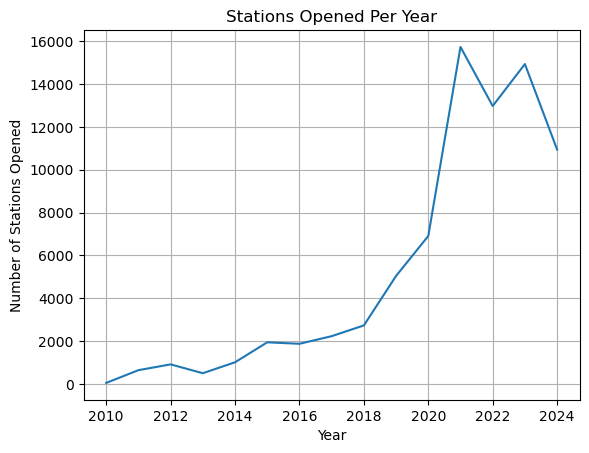

In [51]:
plt.plot(loc_count.index, loc_count['Station Name'])
plt.ylabel('Number of Stations Opened')
plt.xlabel('Year')
plt.title('Stations Opened Per Year')
plt.grid()

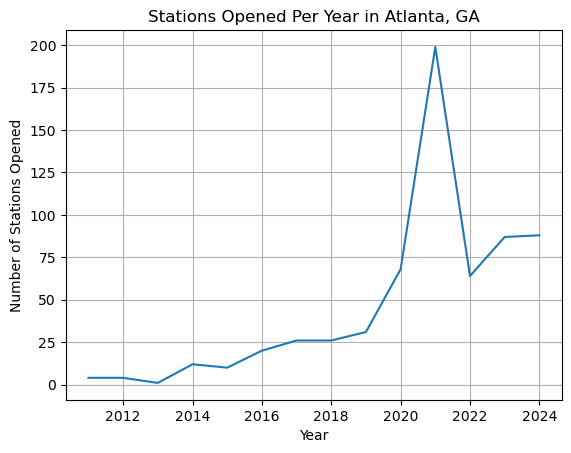

In [57]:
atl_locations = locations.loc[(locations['City'] == 'Atlanta') & (locations['State'] == 'GA')]
loc_count = atl_locations.groupby('Year').count()
plt.plot(loc_count.index, loc_count['Station Name'])
plt.ylabel('Number of Stations Opened')
plt.xlabel('Year')
plt.title('Stations Opened Per Year in Atlanta, GA')
plt.grid()

In [46]:
loc_frank = frank.groupby(['City', 'State'])['Distance'].mean()
loc_frank.to_csv('data/location_experiment.csv')

In [50]:
loc_frank = frank.groupby('State')['Distance'].mean()
loc_frank_sorted = loc_frank.sort_values()[::-1]
loc_frank_sorted[-5:]

State
ME    2.751079
MA    2.628853
VT    2.479818
NJ    2.163059
NH    1.091158
Name: Distance, dtype: float64